In [ ]:
!pip install river==0.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.0/846.0 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for river: filename=river-0.7.0-cp310-cp310-linux_x86_64.whl size=2361408 sha256=322eea6a5f3d40a9c9a07bbf9098635899cf6eeb81b5894ceca589b761cc61c0
  Stored in directory: /root/.cache/pip/wheels/71/e9/7e/105173d51ebb5262f6f2dc4f6a5003ec86365255e8fd989733
Successfully built river


In [ ]:
!pip install memory-profiler

In [ ]:
!pip install optunity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for optunity: filename=Optunity-1.1.1-py3-none-any.whl size=72029 sha256=6cc4c9abaa7e7b5a0e978b09220fa6cf9e304220a4820a70e8ba4bcf2574f858
  Stored in directory: /root/.cache/pip/wheels/83/98/40/b9956c3386a045f035f9edbf894edd04713db92f29fb58a225
Successfully built optunity


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from river import metrics
from river import stream
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_ac = pd.read_csv("/content/drive/MyDrive/dataset_3/final_word2vec_embeddings.csv")
data_ac

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Labels
0,-0.738774,0.423808,0.003995,0.273944,0.278326,-1.121458,0.454719,1.502387,-0.452733,-0.428994,...,0.342938,0.410237,0.152521,1.277104,0.658314,0.545501,-0.570829,0.249611,-0.109978,defamation
1,-0.619033,0.329192,0.022692,0.235937,0.248457,-0.965012,0.380227,1.300560,-0.398977,-0.371881,...,0.294719,0.373720,0.122191,1.099739,0.572746,0.456177,-0.471100,0.207174,-0.086312,defamation
2,-0.571574,0.299238,-0.006072,0.161510,0.171843,-0.841635,0.351617,1.178249,-0.370599,-0.369380,...,0.290438,0.309227,0.097336,1.008879,0.514697,0.401754,-0.448323,0.229164,-0.116520,offensive
3,-0.693572,0.377203,-0.034788,0.021350,0.108946,-1.090244,0.477415,1.511605,-0.494512,-0.584275,...,0.443037,0.403338,0.099636,1.272146,0.625714,0.480765,-0.551331,0.484435,-0.256572,defamation
4,-0.681069,0.340770,0.052980,0.315516,0.321273,-1.118251,0.403905,1.505227,-0.433163,-0.378178,...,0.304497,0.480876,0.130662,1.245840,0.641551,0.486499,-0.506558,0.170703,-0.054753,defamation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,-0.610508,0.325818,0.016663,0.223962,0.238698,-0.951373,0.377389,1.279268,-0.385967,-0.367746,...,0.286671,0.363505,0.124844,1.079881,0.563961,0.456501,-0.462929,0.208613,-0.082545,fake
4046,-0.759056,0.366382,-0.067336,0.075107,0.111369,-1.029236,0.473590,1.567880,-0.518333,-0.574409,...,0.427655,0.364200,0.080937,1.351092,0.671494,0.499966,-0.620885,0.396790,-0.248402,offensive
4047,-0.563781,0.319814,-0.016565,0.102086,0.145742,-0.846798,0.362547,1.175709,-0.373543,-0.396986,...,0.309239,0.314056,0.091386,0.995828,0.501793,0.397479,-0.443315,0.290451,-0.155532,fake
4048,-0.696312,0.382200,0.017211,0.268777,0.279556,-1.075449,0.427181,1.454106,-0.445363,-0.406037,...,0.330988,0.425229,0.137699,1.233303,0.634003,0.514665,-0.529264,0.231174,-0.101697,hate


In [ ]:
data_ac.Labels.replace('defamation',0,inplace=True)
data_ac.Labels.replace('fake',1,inplace=True)
data_ac.Labels.replace('offensive',2,inplace=True)
data_ac.Labels.replace('non-hostile',3,inplace=True)
data_ac.Labels.replace('hate',4,inplace=True)

In [ ]:
X = data_ac.iloc[:, :-1]
y = data_ac.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.45, test_size = 0.55, shuffle=False, random_state = 0)

In [ ]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1822,-0.542140,0.277381,0.011274,0.186687,0.201333,-0.827207,0.325673,1.128116,-0.345182,-0.335109,...,0.395855,0.260928,0.318794,0.096865,0.956741,0.499797,0.399113,-0.413668,0.187969,-0.085093
1823,-0.566209,0.302033,-0.018853,0.079115,0.126811,-0.851403,0.365507,1.202816,-0.389505,-0.426479,...,0.456538,0.320543,0.316672,0.089430,1.006460,0.509680,0.403725,-0.459669,0.307421,-0.177289
1824,-0.496473,0.257637,-0.039797,0.063291,0.078228,-0.678690,0.313881,1.006414,-0.327729,-0.359206,...,0.389131,0.275598,0.231670,0.063759,0.871731,0.434883,0.330321,-0.401671,0.256160,-0.151264
1825,-0.696247,0.309341,0.057754,0.290294,0.308741,-1.120805,0.389928,1.472395,-0.434065,-0.407225,...,0.509846,0.297277,0.455932,0.121134,1.226633,0.663321,0.510050,-0.501604,0.174449,-0.041548
1826,-0.723020,0.382658,0.017181,0.270622,0.284872,-1.126954,0.439978,1.507357,-0.451548,-0.426162,...,0.519669,0.328354,0.430160,0.142430,1.258517,0.667857,0.541154,-0.552963,0.235261,-0.091336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,-0.610508,0.325818,0.016663,0.223962,0.238698,-0.951373,0.377389,1.279268,-0.385967,-0.367746,...,0.439622,0.286671,0.363505,0.124844,1.079881,0.563961,0.456501,-0.462929,0.208613,-0.082545
4046,-0.759056,0.366382,-0.067336,0.075107,0.111369,-1.029236,0.473590,1.567880,-0.518333,-0.574409,...,0.623778,0.427655,0.364200,0.080937,1.351092,0.671494,0.499966,-0.620885,0.396790,-0.248402
4047,-0.563781,0.319814,-0.016565,0.102086,0.145742,-0.846798,0.362547,1.175709,-0.373543,-0.396986,...,0.426460,0.309239,0.314056,0.091386,0.995828,0.501793,0.397479,-0.443315,0.290451,-0.155532
4048,-0.696312,0.382200,0.017211,0.268777,0.279556,-1.075449,0.427181,1.454106,-0.445363,-0.406037,...,0.493222,0.330988,0.425229,0.137699,1.233303,0.634003,0.514665,-0.529264,0.231174,-0.101697


In [ ]:
g=X_test.loc[405]

In [ ]:
xi2 = np.array(g)

In [ ]:
g

0    -0.563235
1     0.294034
2     0.013642
3     0.189435
4     0.204816
        ...   
95    0.516159
96    0.414190
97   -0.424419
98    0.193112
99   -0.076907
Name: 405, Length: 100, dtype: float64

In [ ]:
xi2

array([-5.6323516e-01,  2.9403406e-01,  1.3642280e-02,  1.8943484e-01,
        2.0481601e-01, -8.6729217e-01,  3.3833470e-01,  1.1690366e+00,
       -3.4968030e-01, -3.4128930e-01,  1.2126135e-01, -8.6429566e-01,
       -6.3433050e-02,  4.8246887e-01,  2.1671002e-01, -5.0311320e-01,
        3.6151457e-01, -4.0217534e-01,  7.2103736e-05, -9.8509735e-01,
        1.8008508e-01,  1.3267685e-01,  5.1746410e-01, -5.4666966e-01,
       -9.9248380e-02, -2.1323098e-02, -3.3789316e-01, -5.6132022e-02,
       -5.9495980e-01, -1.3405716e-01,  5.4103756e-01, -1.2278259e-02,
        4.4009742e-01, -6.2336445e-01, -1.3166761e-01,  4.9316710e-01,
        1.3298978e-01, -2.9396904e-01, -3.3617663e-01, -1.0121893e+00,
        1.9179423e-01, -6.2092880e-01, -2.1814492e-01, -3.1316537e-02,
        6.2472500e-01, -1.8590488e-01, -5.1329890e-01, -1.2999927e-01,
        3.4318560e-01,  2.1223758e-01,  3.0899300e-01, -4.6164054e-01,
       -2.0226899e-01, -2.5457966e-01, -4.0539798e-01,  1.6305926e-01,
      

In [ ]:
X_train.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
95    float64
96    float64
97    float64
98    float64
99    float64
Length: 100, dtype: object

In [ ]:
%%time
import memory_profiler as mem_profile
m1 = mem_profile.memory_usage()
print('Memory (Before): ' + str(m1[0]) + ' MB' )

classifier = lgb.LGBMClassifier(verbose=-1)
# classifier = joblib.load('Optimized_lightGBM.pkl')
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)
print("Accuracy: "+str(accuracy_score(y_test,predictions)))

m2 = mem_profile.memory_usage()
print('Memory (After) : ' + str(m2[0]) + ' MB')
print('Memory Consumption : ' + str(m2[0]-m1[0]) + ' MB')

Memory (Before): 543.45703125 MB
Accuracy: 0.40754039497307004
Memory (After) : 560.99609375 MB
Memory Consumption : 17.5390625 MB
CPU times: user 5.04 s, sys: 20.8 ms, total: 5.06 s
Wall time: 5.31 s


In [ ]:
import time
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

# a: warining threshold, b: drift threshold, win1: sliding window size, win2: adaptive window max size
def oasw_bo(params):

    a=abs(float(params['a']))
    b=abs(float(params['b']))
    win1=int(params['win1'])
    win2=int(params['win2'])

    i=0
    yt = []
    yp = []
    x_new=[]
    y_new=[]
    dr=[0]
    d=0
    f=0
    tt=0
    th=0
    xt=[]

    metric = metrics.Accuracy()

    classifier = lgb.LGBMClassifier(verbose=-1) # Train the initial LightGBM model
    classifier.fit(X_train,y_train)

    for j in range(1822,4050):
        xi = X_test.loc[j]
        yi = y_test[j]
        xi2= np.array(xi)

        y_pred = classifier.predict(xi2.reshape(1, -1))      # make a prediction
        #print(yi)
        #print(y_pred[0])
        metric = metric.update(yi, y_pred[0])  # update the metric

        # Store the y_test, y_pred, and x_test
        yt.append(yi)
        yp.append(y_pred)

        xt.append(xi2)

        # Monitor the accuracy changes in the sliding window
        if i>2*win1:
            acc1=accuracy_score(yt[i-win1:],yp[i-win1:]) # Current window accuracy
            acc2=accuracy_score(yt[i-2*win1:i-win1],yp[i-2*win1:i-win1]) # Last window accuracy
            if (d==0)&(acc1<a*acc2): # If the window accuracy drops to the warning level
                x_new.append(xi2)
                y_new.append(yi)
                d=1
            if d==1: # In the warning level
                tt=len(y_new)
                if acc1<b*acc2: # If the window accuracy drops to the drift level
                    dr.append(i)# Record the drift start point
                    f=i
                    if tt<win1: # if enough new concept samples are collected
                        classifier.fit(xt[i-win1:],yt[i-win1:])
                    else:
                        classifier.fit(x_new,y_new)
                    d=2
                elif (acc1>a*acc2)|(tt==win2): # If the window accuracy increases back to the normal level (false alarm)
                    x_new=[]
                    y_new=[]
                    d=0
                else:
                    x_new.append(xi2)
                    y_new.append(yi)
            if d==2: # In the drift level
                tt=len(y_new)
                acc3=accuracy_score(yt[f:f+win1],yp[f:f+win1])
                x_new.append(xi2)
                y_new.append(yi)
                if tt>=win1:
                    if (acc1<a*acc3): # When new concept accuracy drops to the warning level
                        if th==0:
                            classifier.fit(x_new,y_new) # Retrain the classifier on all the newly collected samples to obtain a robust classifier
                            th=1
                    if (th==1)&(tt==win2): # When sufficient new concept samples are collected
                        classifier.fit(x_new,y_new) #obtain a robust classifier
                        x_new=[]
                        y_new=[]
                        d=0 # Go back to the normal state for next potential drift detection
                        th=0

        i=i+1
    score=metric.get()
    print(str(a)+" "+str(b)+" "+str(win1)+" "+str(win2)+" "+str(score)) # Output the hyperparameter values and corresponding accuracy
    return {'loss': -score, 'status': STATUS_OK }

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
space = {
    'a': hp.quniform('a', 0.95, 0.99, 0.001),
    'b': hp.quniform('b', 0.90, 0.98, 0.001),
    'win1': hp.quniform('win1', 200, 1000, 50),
    'win2': hp.quniform('win2', 1000, 4000, 100),
}

t1=time.time()
best = fmin(fn=oasw_bo,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("Hyperopt estimated optimum {}".format(best))
t2=time.time()
print(t2-t1)

0.984 0.96 350 1900 0.3846499102333932
0.987 0.92 300 3300 0.3864452423698384
0.966 0.907 800 1600 0.40754039497307004
0.967 0.9500000000000001 900 2900 0.40529622980251345
0.968 0.964 650 3100 0.40619389587073607
0.967 0.93 300 1200 0.38150807899461403
0.961 0.9510000000000001 200 1600 0.39317773788150806
0.9580000000000001 0.918 400 1400 0.40394973070017953
0.966 0.9490000000000001 900 1200 0.40484739676840215
0.971 0.9460000000000001 400 1200 0.3999102333931777
100%|██████████| 10/10 [02:44<00:00, 16.42s/trial, best loss: -0.40754039497307004]
Hyperopt estimated optimum {'a': 0.966, 'b': 0.907, 'win1': 800.0, 'win2': 1600.0}
164.2369384765625


In [ ]:
def oasw(a=0.99, b=0.95, win1=200, win2=1000):
    a = round(a, 3)
    b = round(b, 3)
    win1 = round(win1)
    win2 = round(win2)

    i=0
    yt = []
    yp = []
    x_new=[]
    y_new=[]
    dr=[0]
    d=0
    f=0
    tt=0
    th=0
    xt=[]

    metric = metrics.Accuracy()

    classifier = lgb.LGBMClassifier(verbose=-1) # Train the initial LightGBM model
    classifier.fit(X_train,y_train)

    for j in range(1822,4050):

        xi = X_test.loc[j]
        yi = y_test[j]
        xi2= np.array(xi)

        y_pred = classifier.predict(xi2.reshape(1, -1))      # make a prediction
        #print(yi)
        #print(y_pred[0])
        metric = metric.update(yi, y_pred[0])  # update the metric

        # Store the y_test, y_pred, and x_test
        yt.append(yi)
        yp.append(y_pred)
        xt.append(xi2)

        # Monitor the accuracy changes in the sliding window
        if i>2*win1:
            acc1=accuracy_score(yt[i-win1:],yp[i-win1:]) # Current window accuracy
            acc2=accuracy_score(yt[i-2*win1:i-win1],yp[i-2*win1:i-win1]) # Last window accuracy
            if (d==0)&(acc1<a*acc2): # If the window accuracy drops to the warning level
                x_new.append(xi2)
                y_new.append(yi)
                d=1
            if d==1: # In the warning level
                tt=len(y_new)
                if acc1<b*acc2: # If the window accuracy drops to the drift level
                    dr.append(i)# Record the drift start point
                    f=i
                    if tt<win1: # if enough new concept samples are collected
                        classifier.fit(xt[i-win1:],yt[i-win1:])
                    else:
                        classifier.fit(x_new,y_new)
                    d=2
                elif (acc1>a*acc2)|(tt==win2): # If the window accuracy increases back to the normal level (false alarm)
                    x_new=[]
                    y_new=[]
                    d=0
                else:
                    x_new.append(xi2)
                    y_new.append(yi)
            if d==2: # In the drift level
                tt=len(y_new)
                acc3=accuracy_score(yt[f:f+win1],yp[f:f+win1])
                x_new.append(xi2)
                y_new.append(yi)
                if tt>=win1:
                    if (acc1<a*acc3): # When new concept accuracy drops to the warning level
                        if th==0:
                            classifier.fit(x_new,y_new) # Retrain the classifier on all the newly collected samples to obtain a robust classifier
                            th=1
                    if (th==1)&(tt==win2): # When sufficient new concept samples are collected
                        classifier.fit(x_new,y_new) #obtain a robust classifier
                        x_new=[]
                        y_new=[]
                        d=0 # Go back to the normal state for next potential drift detection
                        th=0

        i=i+1
    score=metric.get()
    print(str(a)+" "+str(b)+" "+str(win1)+" "+str(win2)+" "+str(score)) # Output the hyperparameter values and corresponding accuracy
    return score

In [ ]:
import optunity
import optunity.metrics

search = {
    'a': [0.95,0.99],
    'b': [0.90,0.98],
    'win1': [200,1000],
    'win2': [1000,5000],
         }

optimal_configuration, info, _ = optunity.maximize(oasw,
                                                  solver_name='particle swarm',
                                                  num_evals=10,
                                                   **search
                                                  )
print(optimal_configuration)
print("Accuracy:"+ str(info.optimum))

0.962 0.979 586 1445 0.4097845601436266
0.967 0.929 686 4945 0.41337522441651703
0.987 0.969 286 2945 0.3904847396768402
0.977 0.909 486 3945 0.40754039497307004
0.957 0.949 886 1945 0.40754039497307004
0.96 0.934 536 2695 0.40574506283662476
0.98 0.974 936 4695 0.40574506283662476
0.99 0.914 736 1695 0.40754039497307004
0.97 0.954 336 3695 0.3864452423698384
0.965 0.904 836 2195 0.40754039497307004
{'a': 0.9671093749999999, 'b': 0.92859375, 'win1': 685.9375, 'win2': 4945.3125}
Accuracy:0.41337522441651703


In [ ]:
# Define OASW with a figure
def oasw_plot(a=0.99, b=0.95, win1=200, win2=1000):
    a = round(a, 3)
    b = round(b, 3)
    win1 = round(win1)
    win2 = round(win2)

    metric = metrics.Accuracy()
    metric2 = metrics.Accuracy()

    i = 0
    t = []
    yt = []
    yp = []
    m = []
    m2 = []
    x_new=[]
    y_new=[]
    dr=[0]
    d=0
    f=0
    tt=0
    th=0
    xt=[]

    classifier = lgb.LGBMClassifier(verbose=-1) # Train the initial LightGBM model
    classifier.fit(X_train,y_train)

    classifier2 = lgb.LGBMClassifier(verbose=-1) # Train an offline LightGBM model as a comparison model
    classifier2.fit(X_train,y_train)

    for j in range(1822,4050):
        xi = X_test.loc[j]
        yi = y_test[j]
        xi2= np.array(xi)

        y_pred = classifier.predict(xi2.reshape(1, -1))      # make a prediction
        #print(yi)
        #print(y_pred[0])
        metric = metric.update(yi, y_pred[0])  # update the metric


        y_pred2= classifier2.predict(xi2.reshape(1, -1))
        metric2 = metric2.update(yi, y_pred2[0])

        # Store the y_test, y_pred, x_test, and real-time accuracy
        t.append(i)
        m.append(metric.get()*100)
        yt.append(yi)
        yp.append(y_pred)
        m2.append(metric2.get()*100)
        xt.append(xi2)

        # Monitor the accuracy changes in the sliding window
        if i>2*win1:
            acc1=accuracy_score(yt[i-win1:],yp[i-win1:]) # Current window accuracy
            acc2=accuracy_score(yt[i-2*win1:i-win1],yp[i-2*win1:i-win1]) # Last window accuracy
            if (d==0)&(acc1<a*acc2): # If the window accuracy drops to the warning level
                x_new.append(xi2)
                y_new.append(yi)
                d=1
            if d==1: # In the warning level
                tt=len(y_new)
                if acc1<b*acc2: # If the window accuracy drops to the drift level
                    dr.append(i)# Record the drift start point
                    f=i
                    if tt<win1: # if enough new concept samples are collected
                        classifier.fit(xt[i-win1:],yt[i-win1:])
                    else:
                        classifier.fit(x_new,y_new)
                    d=2
                elif (acc1>a*acc2)|(tt==win2): # If the window accuracy increases back to the normal level (false alarm)
                    x_new=[]
                    y_new=[]
                    d=0
                else:
                    x_new.append(xi2)
                    y_new.append(yi)

            if d==2: # In the drift level
                tt=len(y_new)
                acc3=accuracy_score(yt[f:f+win1],yp[f:f+win1])
                x_new.append(xi2)
                y_new.append(yi)
                if tt>=win1:
                    if (acc1<a*acc3): # When new concept accuracy drops to the warning level
                        if th==0:
                            classifier.fit(x_new,y_new) # Retrain the classifier on all the newly collected samples to obtain a robust classifier
                            th=1
                    if (th==1)&(tt==win2): # When sufficient new concept samples are collected
                        classifier.fit(x_new,y_new) #obtain a robust classifier
                        x_new=[]
                        y_new=[]
                        d=0 # Go back to the normal state for next potential drift detection
                        th=0

        i=i+1

    # Plot the accuracy change figure
    plt.rcParams.update({'font.size': 35})
    plt.ion()
    plt.figure(1,figsize=(24,15))
    sns.set_style("darkgrid")
    plt.clf()
    plt.plot(t,m,'-b',label='OASW+LightGBM, Avg Accuracy: %.2f%%'%(metric.get()*100))
    plt.plot(t,m2,'red',label='Offline LightGBM, Avg Avg Accuracy: %.2f%%'%(metric2.get()*100))

    #Plot the drift points
    for i in range(len(dr)):
        if i!=0:
            plt.scatter(dr[i],m[dr[i]],s=200,c='r')

    plt.legend(loc='best')
    plt.ylim(0,50)
    plt.title('NSL-KDD', fontsize=40)
    plt.xlabel('Number of samples')
    plt.ylabel('Accuracy(%)')

    plt.draw()


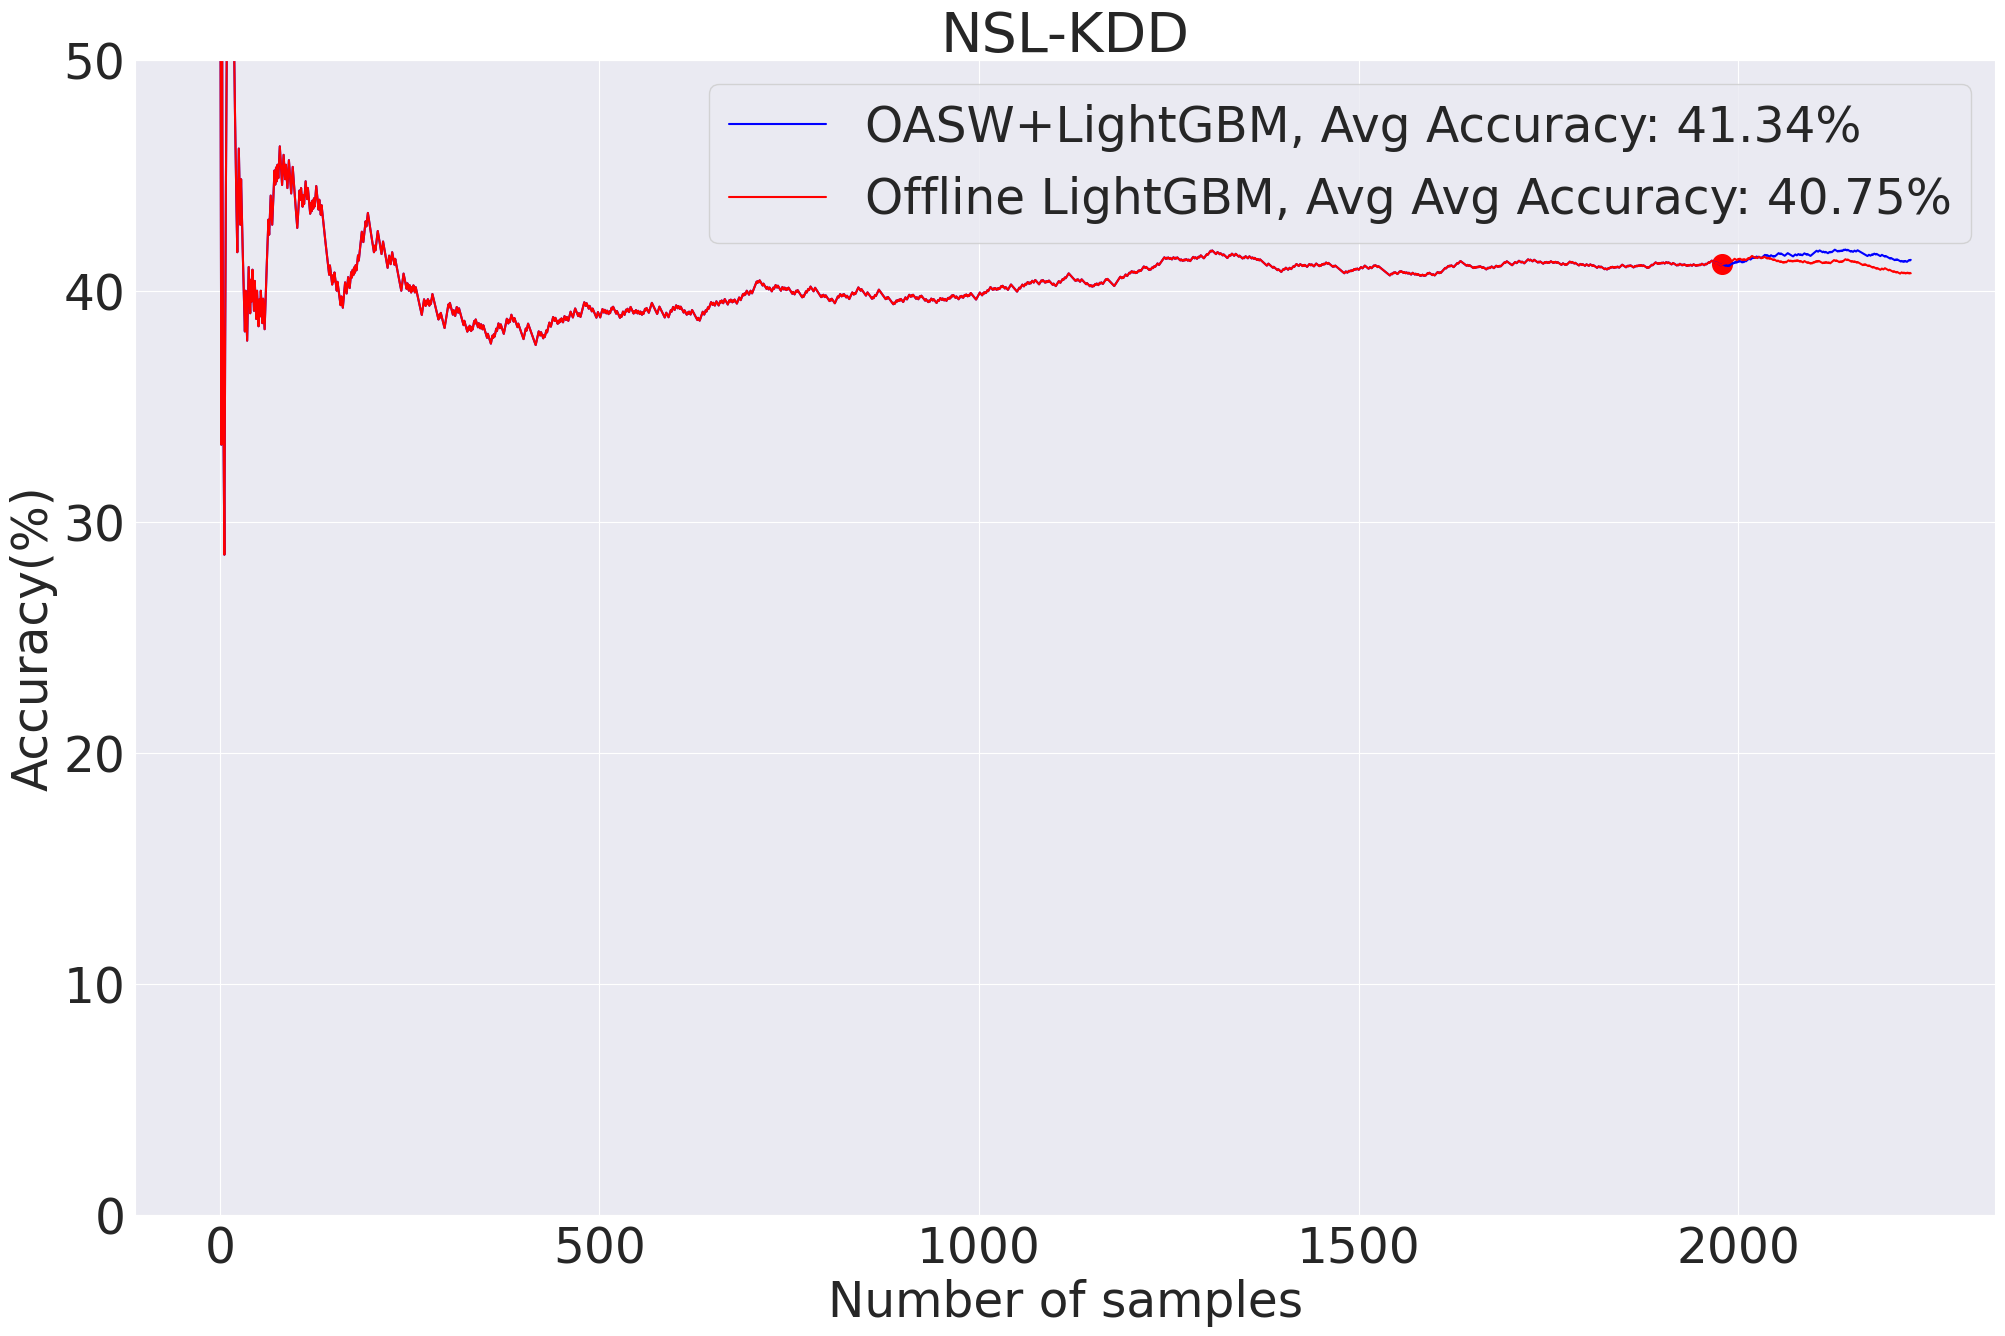

In [ ]:
oasw_plot(a= 0.9671093749999999, b= 0.92859375, win1= 685.9375, win2= 4945.3125)

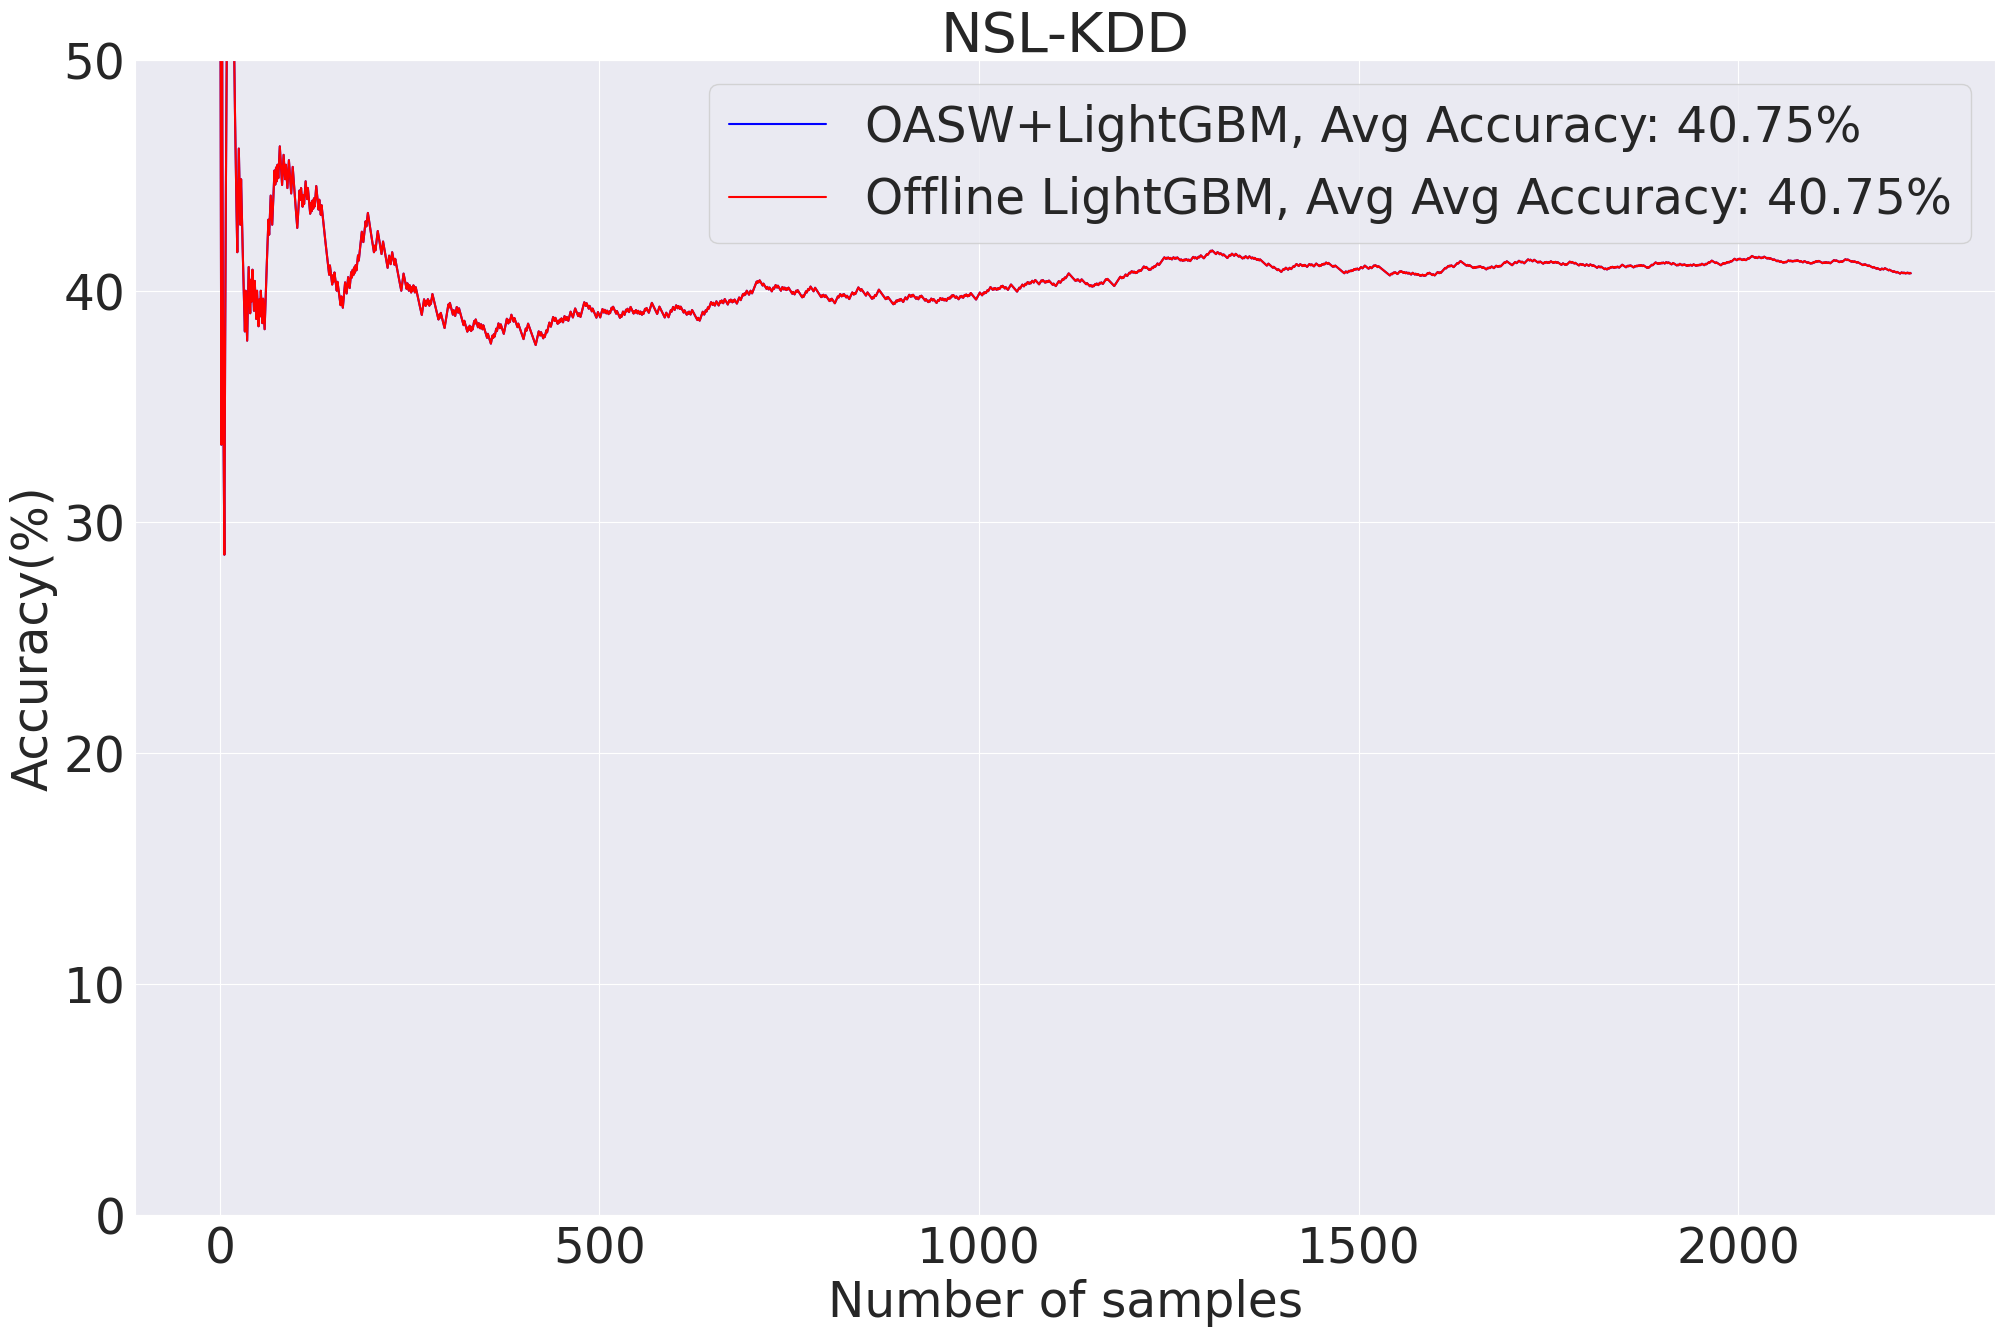

In [ ]:
oasw_plot(a= 0.966, b= 0.907, win1= 800.0, win2= 1600.0)